#PySpark notebook
adapted from [https://github.com/jkthompson/pyspark-pictures]

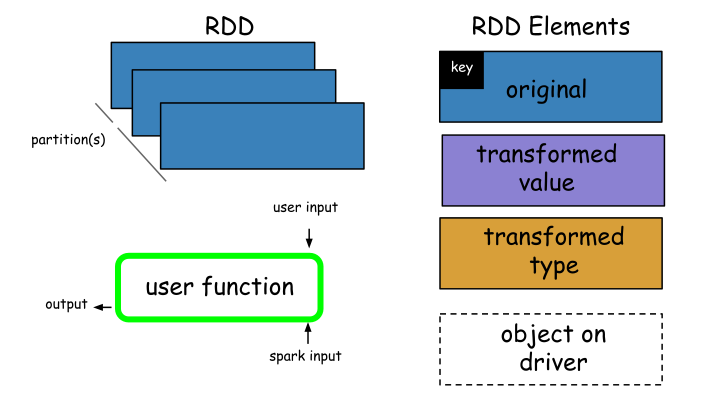

In [1]:
from IPython.display import SVG
SVG(filename='images/pyspark-page2.svg')
#<img align=left src="files/images/pyspark-page2.svg" width=500 height=500 />

In [2]:
# print Spark version
print("pyspark version:" + str(sc.version))

pyspark version:1.3.0


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.map">
<img align=left src="files/images/pyspark-page3.svg" width=500 height=500 />
</a>

In [3]:
# map
x = sc.parallelize([1,2,3]) # sc = spark context, parallelize creates an RDD from the passed object
print(x.collect())  # collect copies RDD elements to a list on the driver

y = x.map(lambda x: (x,x**2))
print(y.collect())

[1, 2, 3]
[(1, 1), (2, 4), (3, 9)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.collect">
<img align=left src="files/images/pyspark-page22.svg" width=500 height=500 />
</a>

In [4]:
# collect
x = sc.parallelize([1,2,3])
print(x)  # distributed

y = x.collect()
print(y)  # not distributed

ParallelCollectionRDD[2] at parallelize at PythonRDD.scala:376
[1, 2, 3]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.flatMap">
<img align=left src="files/images/pyspark-page4.svg" width=500 height=500 />
</a>

In [5]:
# flatMap
x = sc.parallelize([1,2,3])
print(x.collect())

def f(x):
    return [100*x, x**2]
print(x.map(f).collect()) # Map

y = x.flatMap(
    lambda x: (x, 100*x, x**2)) # this lambda yields 2 elements for each element of x
print(y.collect())

[1, 2, 3]
[[100, 1], [200, 4], [300, 9]]
[1, 100, 1, 2, 200, 4, 3, 300, 9]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.glom">
<img align=left src="files/images/pyspark-page16.svg" width=500 height=500 />
</a>

In [6]:
# glom
x = sc.parallelize(['C','B','A'], 2)
print(x.collect()) 

y = x.glom()
print(y.collect())

['C', 'B', 'A']
[['C'], ['B', 'A']]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.mapPartitions">
<img align=left src="files/images/pyspark-page5.svg" width=500 height=500 />
</a>

In [7]:
# mapPartitions
# Return a new RDD by applying a function to each partition of this RDD.

x = sc.parallelize([1,2,3], 2)  # The ssecond argument `2` stands for the number of the partiotions of the RDD
print(x.glom().collect())

def f(iterator):
    yield sum(iterator)

y = x.mapPartitions(f)
print(y.glom().collect())

[[1], [2, 3]]
[[1], [5]]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.mapPartitionsWithIndex">
<img align=left src="files/images/pyspark-page6.svg" width=500 height=500 />
</a>

In [8]:
# mapPartitionsWithIndex
x = sc.parallelize([1,2,3], 2)
print(x.glom().collect())

def f(partitionIndex, iterator):
    #yield (partitionIndex,sum(iterator))
    yield partitionIndex

y = x.mapPartitionsWithIndex(f)
print(y.glom().collect())

[[1], [2, 3]]
[[0], [1]]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.getNumPartitions">
<img align=left src="files/images/pyspark-page7.svg" width=500 height=500 />
</a>

In [9]:
# getNumPartitions
x = sc.parallelize([1,2,3], 2)
print(x.collect())
print(x.glom().collect())

y = x.getNumPartitions()
print(y)

[1, 2, 3]
[[1], [2, 3]]
2


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.filter">
<img align=left src="files/images/pyspark-page8.svg" width=500 height=500 />
</a>

In [10]:
# filter
x = sc.parallelize([1,2,3,4,5,6,7,8,9])
print(x.collect())

y = x.filter(lambda x: x%2 == 1)  # filters out even elements
print(y.collect())

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7, 9]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.distinct">
<img align=left src="files/images/pyspark-page9.svg" width=500 height=500 />
</a>

In [11]:
# distinct
x = sc.parallelize(['A','A','B','A','B'])
print(x.collect())

y = x.distinct()
print(y.collect())

['A', 'A', 'B', 'A', 'B']
['A', 'B']


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.sample">
<img align=left src="files/images/pyspark-page10.svg" width=500 height=500 />
</a>

In [12]:
# sample
x = sc.parallelize(range(10))
print(x.count())
print('x = ' + str(x.collect()))

ylist = [x.sample(withReplacement=False, fraction=.5, seed=1) for i in range(5)] # call 'sample' 5 times

for cnt, y in zip(range(len(ylist)), ylist):
    #print('sample_' + str(cnt) + ' y = ' +  str(y.collect()))
    print('sample_' + str(cnt) + ' y = ' +  str(y.count()))

10
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
sample_0 y = 5
sample_1 y = 5
sample_2 y = 5
sample_3 y = 5
sample_4 y = 5


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.takeSample">
<img align=left src="files/images/pyspark-page11.svg" width=500 height=500 />
</a>

In [13]:
# takeSample
x = sc.parallelize(range(7))
print('x = ' + str(x.collect()))

ylist = [x.takeSample(withReplacement=False, num=3) for i in range(5)]  # call 'sample' 5 times

for cnt,y in zip(range(len(ylist)), ylist):
    print('sample_' + str(cnt) + ' y = ' +  str(y))  # no collect on y

x = [0, 1, 2, 3, 4, 5, 6]
sample_0 y = [5, 4, 2]
sample_1 y = [0, 6, 1]
sample_2 y = [5, 0, 6]
sample_3 y = [6, 0, 1]
sample_4 y = [4, 1, 2]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.union">
<img align=left src="files/images/pyspark-page12.svg" width=500 height=500 />
</a>

In [14]:
# union
x = sc.parallelize(['A','A','B'])
y = sc.parallelize(['D','C','A'])
print(x.collect())
print(y.collect())

z = x.union(y)
print(z.collect())

['A', 'A', 'B']
['D', 'C', 'A']
['A', 'A', 'B', 'D', 'C', 'A']


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.intersection">
<img align=left src="files/images/pyspark-page13.svg" width=500 height=500 />
</a>

In [15]:
# intersection
x = sc.parallelize(['A','A','B'])
y = sc.parallelize(['A','C','D'])
print(x.collect())
print(y.collect())

z = x.intersection(y)
print(z.collect())

['A', 'A', 'B']
['A', 'C', 'D']
['A']


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.sortByKey">
<img align=left src="files/images/pyspark-page14.svg" width=500 height=500 />
</a>

In [16]:
# sortByKey
x = sc.parallelize([('B',1),('A',2),('D',3),('C',3)],2)
print "Unsorted:\n" + str(x.collect())
print str(x.glom().collect()) + "\n\nSorted:"


y = x.sortByKey()
print str(y.collect())
print str(y.glom().collect())

Unsorted:
[('B', 1), ('A', 2), ('D', 3), ('C', 3)]
[[('B', 1), ('A', 2)], [('D', 3), ('C', 3)]]

Sorted:
[('A', 2), ('B', 1), ('C', 3), ('D', 3)]
[[('A', 2), ('B', 1), ('C', 3)], [('D', 3)]]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.sortBy">
<img align=left src="files/images/pyspark-page15.svg" width=500 height=500 />
</a>

In [17]:
# sortBy
x = sc.parallelize(['Cat','Apple','Bat'])
print(x.collect())

def keyGen(val):
    return val[0]

y = x.sortBy(keyGen)

print(y.collect())

['Cat', 'Apple', 'Bat']
['Apple', 'Bat', 'Cat']


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.cartesian">
<img align=left src="files/images/pyspark-page17.svg" width=500 height=500 />
</a>

In [18]:
# cartesian
x = sc.parallelize(['A','B'])
y = sc.parallelize(['C','D'])
print(x.collect())
print(y.collect())


z = x.cartesian(y)
print(z.collect())

['A', 'B']
['C', 'D']
[('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D')]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.groupBy">
<img align=left src="files/images/pyspark-page18.svg" width=500 height=500 />
<

In [19]:
# groupBy
x = sc.parallelize([5,9,4,5,1,4,8],2)
print(x.collect())

y = x.groupBy(lambda x: x%2)
#y = x.groupBy(lambda x: 'A' if (x%2 == 1) else 'B' )
print(y.collect()) # y is nested, this iterates through it
print([(j[0],[i for i in j[1]]) for j in y.collect()]) # y is nested, this iterates through it

[5, 9, 4, 5, 1, 4, 8]
[(0, <pyspark.resultiterable.ResultIterable object at 0x7f73700ccd10>), (1, <pyspark.resultiterable.ResultIterable object at 0x7f73700ccbd0>)]
[(0, [4, 4, 8]), (1, [5, 9, 5, 1])]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.pipe">
<img align=left src="files/images/pyspark-page19.svg" width=500 height=500 />
</a>

In [20]:
# pipe
# Return an RDD created by piping elements to a forked external process.
x = sc.parallelize(['A', 'Ba', 'C', 'AD'])
print(x.collect())

y = x.pipe('grep -i "A"') # calls out to grep, may fail under Windows 
print(y.collect())

['A', 'Ba', 'C', 'AD']
['A', 'Ba', 'AD']


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.foreach">
<img align=left src="files/images/pyspark-page20.svg" width=500 height=500 />
</a>

In [21]:
# foreach
# Applies a function to all elements of this RDD.
from __future__ import print_function
x = sc.parallelize([1,2,3,4,5],1)

def f(el):
    '''side effect: append the current RDD elements to a file'''
    f1 = open("./foreachExample.txt", 'a+') 
    print(el, file=f1)

open('./foreachExample.txt', 'w').close() # first clear the file contents

y = x.foreach(f) # writes into foreachExample.txt

print(x.collect())
print(y) # foreach returns 'None'

# print the contents of foreachExample.txt
with open("./foreachExample.txt", "r") as foreachExample:
    print (foreachExample.read())

### Now try with 2 partition for x

[1, 2, 3, 4, 5]
None
1
2
3
4
5



<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.foreachPartition">
<img align=left src="files/images/pyspark-page21.svg" width=500 height=500 />
</a>

In [22]:
# foreachPartition
from __future__ import print_function

x = sc.parallelize([1,2,3],5)

def f(parition):
    '''side effect: append the current RDD partition contents to a file'''
    f1=open("./foreachPartitionExample.txt", 'a+') 
    print([el for el in parition],file=f1)

open('./foreachPartitionExample.txt', 'w').close()  # first clear the file contents

y = x.foreachPartition(f) # writes into foreachExample.txt

print(x.glom().collect())
print(y)  # foreach returns 'None'

# print the contents of foreachExample.txt
with open("./foreachPartitionExample.txt", "r") as foreachExample:
    print (foreachExample.read())

[[], [1], [], [2], [3]]
None
[1]
[]
[]
[2]
[3]



<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.reduce">
<img align=left src="files/images/pyspark-page23.svg" width=500 height=500 />
</a>

In [23]:
# reduce
x = sc.parallelize([1,2,3])
print(x.collect())

y = x.reduce(lambda obj, accumulated: obj + accumulated)  # computes a cumulative sum
print(y)

[1, 2, 3]
6


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.fold">
<img align=left src="files/images/pyspark-page24.svg" width=500 height=500 />
</a>

In [24]:
# fold
x = sc.parallelize([1,2,3])
print(x.collect())

neutral_zero_value = 0  # 0 for sum, 1 for multiplication
y = x.fold(neutral_zero_value,lambda obj, accumulated: accumulated + obj) # computes cumulative sum
print(y)

[1, 2, 3]
6


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.aggregate">
<img align=left src="files/images/pyspark-page25.svg" width=500 height=500 />
</a>

In [25]:
# aggregate
x = sc.parallelize([2,3,4])
print(x.collect())

neutral_zero_value = (0,1) # sum: x+0 = x, product: 1*x = x

seqOp = (lambda aggregated, el: (aggregated[0] + el, aggregated[1] * el)) 
combOp = (lambda aggregated, el: (aggregated[0] + el[0], aggregated[1] * el[1]))

y = x.aggregate(neutral_zero_value,seqOp,combOp)  # computes (cumulative sum, cumulative product)
print(y)

[2, 3, 4]
(9, 24)


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.max">
<img align=left src="files/images/pyspark-page26.svg" width=500 height=500 />
</a>

In [26]:
# max
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.max()
print(y)

[1, 3, 2]
3


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.min">
<img align=left src="files/images/pyspark-page27.svg" width=500 height=500 />
</a>

In [27]:
# min
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.min()
print(y)

[1, 3, 2]
1


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.sum">
<img align=left src="files/images/pyspark-page28.svg" width=500 height=500 />
</a>

In [28]:
# sum
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.sum()
print(y)

[1, 3, 2]
6


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.count">
<img align=left src="files/images/pyspark-page29.svg" width=500 height=500 />
</a>

In [29]:
# count
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.count()
print(y)

[1, 3, 2]
3


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.histogram">
<img align=left src="files/images/pyspark-page30.svg" width=500 height=500 />
</a>

In [30]:
# histogram (example #1)
x = sc.parallelize([1,3,1,2,3])
#x = sc.parallelize([1,3,1,2,3,4,5,6,7,8])
print(x.collect())

# If buckets is a number,
# it will generates buckets which are evenly spaced between the minimum and maximum of the RDD
y = x.histogram(buckets = 2)
print(y)

[1, 3, 1, 2, 3]
([1, 2, 3], [2, 3])


In [31]:
# histogram (example #2)
x = sc.parallelize([1,3,1,2,3])
y = x.histogram([0,0.5,1,1.5,2,2.5,3,3.5])

print(x.collect())
print(y)

[1, 3, 1, 2, 3]
([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5], [0, 0, 2, 0, 1, 0, 2])


In [32]:
rdd = sc.parallelize(["ab","a","c","b", "ac", "b", "bd", "ef"])
rdd.histogram(("a", "b", "c"))

(('a', 'b', 'c'), [3, 4])

<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.mean">
<img align=left src="files/images/pyspark-page31.svg" width=500 height=500 />
</a>

In [33]:
# mean
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.mean()
print(y)

[1, 3, 2]
2.0


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.variance">
<img align=left src="files/images/pyspark-page32.svg" width=500 height=500 />
</a>

In [34]:
# variance
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.variance()  # divides by N
print(y)

[1, 3, 2]
0.666666666667


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.stdev">
<img align=left src="files/images/pyspark-page33.svg" width=500 height=500 />
</a>

In [35]:
# stdev
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.stdev()  # divides by N
print(y)


import math
print(math.sqrt( x.variance() ))

[1, 3, 2]
0.816496580928
0.816496580928


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.sampleStdev">
<img align=left src="files/images/pyspark-page34.svg" width=500 height=500 />
</a>

In [36]:
# sampleStdev
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.sampleStdev() # divides by N-1
print(y)

[1, 3, 2]
1.0


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.sampleVariance">
<img align=left src="files/images/pyspark-page35.svg" width=500 height=500 />
</a>

In [37]:
# sampleVariance
x = sc.parallelize([1,3,2])
print(x.collect())

y = x.sampleVariance()  # divides by N-1
print(y)

[1, 3, 2]
1.0


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.countByValue">
<img align=left src="files/images/pyspark-page36.svg" width=500 height=500 />
</a>

In [38]:
# countByValue
x = sc.parallelize([1,3,1,2,3])
print(x.collect())

y = x.countByValue()
print(y)

[1, 3, 1, 2, 3]
defaultdict(<type 'int'>, {1: 2, 2: 1, 3: 2})


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.top">
<img align=left src="files/images/pyspark-page37.svg" width=500 height=500 />
</a>

In [39]:
# top
# Get the top N elements from a RDD
x = sc.parallelize([1,3,1,2,3,1,1,1])
print(x.collect())

y = x.top(num = 3)
print(y)

[1, 3, 1, 2, 3, 1, 1, 1]
[3, 3, 2]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.takeOrdered">
<img align=left src="files/images/pyspark-page38.svg" width=500 height=500 />
</a>

In [40]:
# takeOrdered
# Get the N elements from a RDD ordered in ascending order or as specified by the optional key function.

x = sc.parallelize([1,3,1,2,3])
print(x.collect())

y = x.takeOrdered(num = 3)
print(y)

y = x.takeOrdered(num = 6)
print(y)

# recalling the sortBy
y = x.sortBy(lambda x: x).collect()
print(y)

[1, 3, 1, 2, 3]
[1, 1, 2]
[1, 1, 2, 3, 3]
[1, 1, 2, 3, 3]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.take">
<img align=left src="files/images/pyspark-page39.svg" width=500 height=500 />
</a>

In [41]:
x = sc.parallelize([1,3,1,2,3])
print(x.collect())

y = x.take(num = 3)
print(y)

[1, 3, 1, 2, 3]
[1, 3, 1]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.first">
<img align=left src="files/images/pyspark-page40.svg" width=500 height=500 />
</a>

In [42]:
# first
x = sc.parallelize([1,3,1,2,3],2)
print(x.collect())

y = x.first()
print(y)

[1, 3, 1, 2, 3]
1


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.collectAsMap">
<img align=left src="files/images/pyspark-page41.svg" width=500 height=500 />
</a>

In [43]:
# collectAsMap
x = sc.parallelize([('C',3),('A',1),('B',2)])
print(x.collect())

y = x.collectAsMap()
print(y)

[('C', 3), ('A', 1), ('B', 2)]
{'A': 1, 'C': 3, 'B': 2}


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.keys">
<img align=left src="files/images/pyspark-page42.svg" width=500 height=500 />
</a>

In [44]:
# keys
x = sc.parallelize([('C',3),('A',1),('B',2)])
print(x.collect())

y = x.keys()
print(y.collect())

[('C', 3), ('A', 1), ('B', 2)]
['C', 'A', 'B']


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.values">
<img align=left src="files/images/pyspark-page43.svg" width=500 height=500 />
</a>

In [45]:
# values
x = sc.parallelize([('C',3),('A',1),('B',2)])
print(x.collect())

y = x.values()
print(y.collect())

[('C', 3), ('A', 1), ('B', 2)]
[3, 1, 2]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.reduceByKey">
<img align=left src="files/images/pyspark-page44.svg" width=500 height=500 />
</a>

In [46]:
# reduceByKey
x = sc.parallelize([('B',1),('B',2),('A',3),('A',4),('A',5)])
print(x.collect())

y = x.reduceByKey(lambda agg, obj: agg + obj)
print(y.collect())

[('B', 1), ('B', 2), ('A', 3), ('A', 4), ('A', 5)]
[('A', 12), ('B', 3)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.reduceByKeyLocally">
<img align=left src="files/images/pyspark-page45.svg" width=500 height=500 />
</a>

In [47]:
# reduceByKeyLocally
x = sc.parallelize([('B',1),('B',2),('A',3),('A',4),('A',5)])
print(x.collect())

y = x.reduceByKeyLocally(lambda agg, obj: agg + obj)
print(y) # returns the results immediately to the master as a dictionary. No Clollect

[('B', 1), ('B', 2), ('A', 3), ('A', 4), ('A', 5)]
{'A': 12, 'B': 3}


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.countByKey">
<img align=left src="files/images/pyspark-page46.svg" width=500 height=500 />
</a>

In [48]:
# countByKey
x = sc.parallelize([('B',1),('B',2),('A',3),('A',4),('A',5)])
print(x.collect())

y = x.countByKey()#.items()
print(y)

[('B', 1), ('B', 2), ('A', 3), ('A', 4), ('A', 5)]
defaultdict(<type 'int'>, {'A': 3, 'B': 2})


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.join">
<img align=left src="files/images/pyspark-page47.svg" width=500 height=500 />
</a>

In [49]:
# join
x = sc.parallelize([('C',4),('B',3),('A',2),('A',1)])
y = sc.parallelize([('A',8),('B',7),('A',6),('D',5)])
print(x.collect())
print(y.collect())

z = x.join(y)
print(z.collect())

[('C', 4), ('B', 3), ('A', 2), ('A', 1)]
[('A', 8), ('B', 7), ('A', 6), ('D', 5)]
[('A', (2, 8)), ('A', (2, 6)), ('A', (1, 8)), ('A', (1, 6)), ('B', (3, 7))]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.leftOuterJoin">
<img align=left src="files/images/pyspark-page48.svg" width=500 height=500 />
</a>

In [50]:
# leftOuterJoin
x = sc.parallelize([('C',4),('B',3),('A',2),('A',1)])
y = sc.parallelize([('A',8),('B',7),('A',6),('D',5)])
print(x.collect())
print(y.collect())

z = x.leftOuterJoin(y)
print(z.collect())

[('C', 4), ('B', 3), ('A', 2), ('A', 1)]
[('A', 8), ('B', 7), ('A', 6), ('D', 5)]
[('A', (2, 8)), ('A', (2, 6)), ('A', (1, 8)), ('A', (1, 6)), ('C', (4, None)), ('B', (3, 7))]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.rightOuterJoin">
<img align=left src="files/images/pyspark-page49.svg" width=500 height=500 />
</a>

In [51]:
# rightOuterJoin
x = sc.parallelize([('C',4),('B',3),('A',2),('A',1)])
y = sc.parallelize([('A',8),('B',7),('A',6),('D',5)])
print(x.collect())
print(y.collect())

z = x.rightOuterJoin(y)
print(z.collect())

[('C', 4), ('B', 3), ('A', 2), ('A', 1)]
[('A', 8), ('B', 7), ('A', 6), ('D', 5)]
[('A', (2, 8)), ('A', (2, 6)), ('A', (1, 8)), ('A', (1, 6)), ('B', (3, 7)), ('D', (None, 5))]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.partitionBy">
<img align=left src="files/images/pyspark-page50.svg" width=500 height=500 />
</a>

In [52]:
# partitionBy
x = sc.parallelize([(0,1),(1,2),(2,3)],2)
print(x.glom().collect())
print(x.getNumPartitions())

y = x.partitionBy(numPartitions = 3, partitionFunc = lambda x: x)  # only key is passed to paritionFunc
print(y.glom().collect())
print(y.getNumPartitions())

[[(0, 1)], [(1, 2), (2, 3)]]
2
[[(0, 1)], [(1, 2)], [(2, 3)]]
3


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.combineByKey">
<img align=left src="files/images/pyspark-page51.svg" width=500 height=500 />
</a>

In [53]:
# combineByKey
x = sc.parallelize([('B',1),('B',2),('A',3),('A',4),('A',5)],2)
print(x.collect())
#print(x.glom().collect())

# The use provides 3 functions:
createCombiner = (lambda el: [(el,el**2)])     
mergeVal = (lambda aggregated, el: aggregated + [(el,el**2)]) # append to aggregated (applide inside a partition)
mergeComb = (lambda agg1,agg2: agg1 + agg2 )  # append agg1 with agg2

y = x.combineByKey(createCombiner,mergeVal,mergeComb)
print(y.collect())

### Try to change the mergeVal function (e.g. **3 instead of **2), and loock at the partitions (print glom)

[('B', 1), ('B', 2), ('A', 3), ('A', 4), ('A', 5)]
[('A', [(3, 9), (4, 16), (5, 25)]), ('B', [(1, 1), (2, 4)])]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.aggregateByKey">
<img align=left src="files/images/pyspark-page52.svg" width=500 height=500 />
</a>

In [54]:
# aggregateByKey
x = sc.parallelize([('B',1),('B',2),('A',3),('A',4),('A',5)])
print(x.collect())

zeroValue = [] # empty list is 'zero value' for append operation
mergeVal = (lambda aggregated, el: aggregated + [(el,el**2)])
mergeComb = (lambda agg1,agg2: agg1 + agg2 )
y = x.aggregateByKey(zeroValue,mergeVal,mergeComb)
print(y.collect())

[('B', 1), ('B', 2), ('A', 3), ('A', 4), ('A', 5)]
[('A', [(3, 9), (4, 16), (5, 25)]), ('B', [(1, 1), (2, 4)])]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.foldByKey">
<img align=left src="files/images/pyspark-page53.svg" width=500 height=500 />
</a>

In [55]:
# foldByKey
x = sc.parallelize([('B',1),('B',2),('A',3),('A',4),('A',5)])
print(x.collect())

zeroValue = 1 # one is 'zero value' for multiplication
y = x.foldByKey(zeroValue,lambda agg,x: agg*x )  # computes cumulative product within each key
print(y.collect())

[('B', 1), ('B', 2), ('A', 3), ('A', 4), ('A', 5)]
[('A', 60), ('B', 2)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.groupByKey">
<img align=left src="files/images/pyspark-page54.svg" width=500 height=500 />
</a>

In [56]:
# groupByKey
x = sc.parallelize([('B',5),('B',4),('A',3),('A',2),('A',1)])
print(x.collect())

y = x.groupByKey()
print(y.collect())
print([(j[0],[i for i in j[1]]) for j in y.collect()])

[('B', 5), ('B', 4), ('A', 3), ('A', 2), ('A', 1)]
[('A', <pyspark.resultiterable.ResultIterable object at 0x7f73701270d0>), ('B', <pyspark.resultiterable.ResultIterable object at 0x7f7370127f10>)]
[('A', [3, 2, 1]), ('B', [5, 4])]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.flatMapValues">
<img align=left src="files/images/pyspark-page55.svg" width=500 height=500 />
</a>

In [57]:
# flatMapValues
x = sc.parallelize([('A',(1,2,3)),('B',(4,5))])
print(x.collect())

y = x.flatMapValues(lambda x: [i**2 for i in x]) # function is applied to entire value, then result is flattened
print(y.collect())

[('A', (1, 2, 3)), ('B', (4, 5))]
[('A', 1), ('A', 4), ('A', 9), ('B', 16), ('B', 25)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.mapValues">
<img align=left src="files/images/pyspark-page56.svg" width=500 height=500 />
</a>

In [58]:
# mapValues
x = sc.parallelize([('A',(1,2,3)),('B',(4,5))])
print(x.collect())

y = x.mapValues(lambda x: [i**2 for i in x]) # function is applied to entire value
print(y.collect())

[('A', (1, 2, 3)), ('B', (4, 5))]
[('A', [1, 4, 9]), ('B', [16, 25])]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.cogroup">
<img align=left src="files/images/pyspark-page58.svg" width=500 height=500 />
</a>

In [59]:
# cogroup
x = sc.parallelize([('C',4),('B',(3,3)),('A',2),('A',(1,1))])
y = sc.parallelize([('A',8),('B',7),('A',6),('D',(5,5))])
print(x.collect())
print(y.collect())

print("result:")
z = x.cogroup(y)
for key,val in list(z.collect()):
    print(key, [list(i) for i in val])

[('C', 4), ('B', (3, 3)), ('A', 2), ('A', (1, 1))]
[('A', 8), ('B', 7), ('A', 6), ('D', (5, 5))]
result:
A [[2, (1, 1)], [8, 6]]
C [[4], []]
B [[(3, 3)], [7]]
D [[], [(5, 5)]]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.groupWith">
<img align=left src="files/images/pyspark-page57.svg" width=500 height=500 />
</a>

In [60]:
# groupWith
# Alias for cogroup but with support for multiple RDDs
x = sc.parallelize([('C',4),('B',(3,3)),('A',2),('A',(1,1))])
y = sc.parallelize([('B',(7,7)),('A',6),('D',(5,5))])
z = sc.parallelize([('D',9),('B',(8,8))])
print(x.collect())
print(y.collect())
print(z.collect())

a = x.groupWith(y,z)

print("Result:")
for key,val in list(a.collect()): 
    print(key, [list(i) for i in val])

[('C', 4), ('B', (3, 3)), ('A', 2), ('A', (1, 1))]
[('B', (7, 7)), ('A', 6), ('D', (5, 5))]
[('D', 9), ('B', (8, 8))]
Result:
D [[], [(5, 5)], [9]]
C [[4], [], []]
B [[(3, 3)], [(7, 7)], [(8, 8)]]
A [[2, (1, 1)], [6], []]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.sampleByKey">
<img align=left src="files/images/pyspark-page59.svg" width=500 height=500 />
</a>

In [61]:
# sampleByKey
x = sc.parallelize([('A',1),('B',2),('C',3),('B',4),('A',5)])
print(x.collect())

y = x.sampleByKey(withReplacement=False, fractions={'A':0.5, 'B':1, 'C':0.2})
print(y.collect())

[('A', 1), ('B', 2), ('C', 3), ('B', 4), ('A', 5)]
[('A', 1), ('B', 2), ('B', 4), ('A', 5)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.subtractByKey">
<img align=left src="files/images/pyspark-page60.svg" width=500 height=500 />
</a>

In [62]:
# subtractByKey
# Return each (key, value) pair in self that has no pair with matching key in other.

x = sc.parallelize([('C',1),('B',2),('A',3),('A',4)])
y = sc.parallelize([('A',5),('D',6),('A',7),('D',8)])
print(x.collect())
print(y.collect())

z = x.subtractByKey(y)
print(z.collect())

[('C', 1), ('B', 2), ('A', 3), ('A', 4)]
[('A', 5), ('D', 6), ('A', 7), ('D', 8)]
[('C', 1), ('B', 2)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.subtract">
<img align=left src="files/images/pyspark-page61.svg" width=500 height=500 />
</a>

In [63]:
# subtract
# Return each value in self that is not contained in other.
x = sc.parallelize([('C',4),('B',3),('A',2),('A',1)])
y = sc.parallelize([('C',8),('A',2),('D',1)])
print(x.collect())
print(y.collect())

z = x.subtract(y)
print(z.collect())

[('C', 4), ('B', 3), ('A', 2), ('A', 1)]
[('C', 8), ('A', 2), ('D', 1)]
[('A', 1), ('C', 4), ('B', 3)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.keyBy">
<img align=left src="files/images/pyspark-page62.svg" width=500 height=500 />
</a>

In [64]:
# keyBy
# Creates tuples of the elements in this RDD by applying a function

x = sc.parallelize([1,2,3])
print(x.collect())

y = x.keyBy(lambda x: x**2)
print(y.collect())

[1, 2, 3]
[(1, 1), (4, 2), (9, 3)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.repartition">
<img align=left src="files/images/pyspark-page63.svg" width=500 height=500 />
</a>

In [65]:
# repartition

# Internally, this uses a shuffle to redistribute data.
# If you are decreasing the number of partitions in this RDD, consider using coalesce,
# which can avoid performing a shuffle

x = sc.parallelize([1,2,3,4,5],2)
print(x.glom().collect())

y = x.repartition(numPartitions=3)
print(y.glom().collect())

[[1, 2], [3, 4, 5]]
[[], [1, 2, 3, 4], [5]]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.coalesce">
<img align=left src="files/images/pyspark-page64.svg" width=500 height=500 />
</a>

In [66]:
# coalesce
x = sc.parallelize([1,2,3,4,5],2)
print(x.glom().collect())

y = x.coalesce(numPartitions=1)
print(y.glom().collect())

[[1, 2], [3, 4, 5]]
[[1, 2, 3, 4, 5]]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.zip">
<img align=left src="files/images/pyspark-page65.svg" width=500 height=500 />
</a>

In [67]:
# zip

# Assumes that the two RDDs have the same number of partitions
# and the same number of elements in each partition 

x = sc.parallelize(['B','A','A'])
print(x.collect())

y = x.map(lambda x: ord(x))  # zip expects x and y to have same #partitions and #elements/partition
# ord('c') return the UNICODE integer corresponding to the character
print(y.collect())

z = x.zip(y)
print(z.collect())

['B', 'A', 'A']
[66, 65, 65]
[('B', 66), ('A', 65), ('A', 65)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.zipWithIndex">
<img align=left src="files/images/pyspark-page66.svg" width=500 height=500 />
</a>

In [68]:
# zipWithIndex
# Zips this RDD with its element indices
x = sc.parallelize(['B','A','A','C','D','C','E'],5)
print(x.glom().collect())

y = x.zipWithIndex()
print(y.collect())

[['B'], ['A'], ['A', 'C'], ['D'], ['C', 'E']]
[('B', 0), ('A', 1), ('A', 2), ('C', 3), ('D', 4), ('C', 5), ('E', 6)]


<a href="http://spark.apache.org/docs/1.2.0/api/python/pyspark.html#pyspark.RDD.zipWithUniqueId">
<img align=left src="files/images/pyspark-page67.svg" width=500 height=500 />
</a>

In [69]:
# zipWithUniqueId
x = sc.parallelize(['B','A','A'],2)
print(x.glom().collect())

y = x.zipWithUniqueId()
print(y.collect())

[['B'], ['A', 'A']]
[('B', 0), ('A', 1), ('A', 3)]
